In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_model_with_attention

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top'

In [3]:
BATCH_SIZE = 64
unbalanced_dataset = load_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
balanced_train_dataset = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [4]:
all_labels = []

for images, labels in balanced_train_dataset.take(100):
    all_labels.append(labels.numpy())

all_labels = np.concatenate(all_labels)
class_counts = np.sum(all_labels, axis=0)

In [5]:
mean_class_count = np.mean(class_counts)
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [6]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 1.2407 - categorical cross entropy: 1.2407 - mean squared error: 0.0781 - accuracy: 0.6363 - auc: 0.6459 - prc: 0.1915

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_1\assets


29/29 [==============================] - 163s 3s/step - loss: 1.2407 - categorical cross entropy: 1.2407 - mean squared error: 0.0781 - accuracy: 0.6363 - auc: 0.6459 - prc: 0.1915 - val_loss: 144.9480 - val_categorical cross entropy: 144.9480 - val_mean squared error: 0.0943 - val_accuracy: 0.6705 - val_auc: 0.4899 - val_prc: 0.1415 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - ETA: 0s - loss: 0.9481 - categorical cross entropy: 0.9481 - mean squared error: 0.0620 - accuracy: 0.6439 - auc: 0.7842 - prc: 0.2443

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_2\assets


29/29 [==============================] - 77s 3s/step - loss: 0.9481 - categorical cross entropy: 0.9481 - mean squared error: 0.0620 - accuracy: 0.6439 - auc: 0.7842 - prc: 0.2443 - val_loss: 1.5156 - val_categorical cross entropy: 1.5156 - val_mean squared error: 0.1031 - val_accuracy: 0.6705 - val_auc: 0.4842 - val_prc: 0.1405 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 0.8921 - categorical cross entropy: 0.8921 - mean squared error: 0.0586 - accuracy: 0.6708 - auc: 0.8034 - prc: 0.2451

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_3\assets


29/29 [==============================] - 77s 3s/step - loss: 0.8921 - categorical cross entropy: 0.8921 - mean squared error: 0.0586 - accuracy: 0.6708 - auc: 0.8034 - prc: 0.2451 - val_loss: 1.5151 - val_categorical cross entropy: 1.5151 - val_mean squared error: 0.1036 - val_accuracy: 0.6705 - val_auc: 0.4632 - val_prc: 0.1423 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 0.8613 - categorical cross entropy: 0.8613 - mean squared error: 0.0561 - accuracy: 0.6950 - auc: 0.8224 - prc: 0.2582

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_4\assets


29/29 [==============================] - 77s 3s/step - loss: 0.8613 - categorical cross entropy: 0.8613 - mean squared error: 0.0561 - accuracy: 0.6950 - auc: 0.8224 - prc: 0.2582 - val_loss: 1.1201 - val_categorical cross entropy: 1.1201 - val_mean squared error: 0.0661 - val_accuracy: 0.6410 - val_auc: 0.7308 - val_prc: 0.2106 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - 13s 459ms/step - loss: 0.8780 - categorical cross entropy: 0.8780 - mean squared error: 0.0586 - accuracy: 0.6884 - auc: 0.8092 - prc: 0.2519 - val_loss: 1.2250 - val_categorical cross entropy: 1.2250 - val_mean squared error: 0.0748 - val_accuracy: 0.6765 - val_auc: 0.6158 - val_prc: 0.2014 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - 15s 511ms/step - loss: 0.8713 - categorical cross entropy: 0.8713 - mean squared error: 0.0579 - accuracy: 0.6907 - auc: 0.8163 - prc: 0.2608 - val_loss: 1.3272 - val_categorical cross entropy: 1.3272 - val_mean squared error: 0.0749 - val_accu

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_8\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_8\assets


29/29 [==============================] - 78s 3s/step - loss: 0.8126 - categorical cross entropy: 0.8126 - mean squared error: 0.0544 - accuracy: 0.6983 - auc: 0.8539 - prc: 0.2795 - val_loss: 0.9133 - val_categorical cross entropy: 0.9133 - val_mean squared error: 0.0605 - val_accuracy: 0.6880 - val_auc: 0.8093 - val_prc: 0.2932 - lr: 0.0010
Epoch 9/100
29/29 [==============================] - ETA: 0s - loss: 0.8372 - categorical cross entropy: 0.8372 - mean squared error: 0.0564 - accuracy: 0.6934 - auc: 0.8541 - prc: 0.3072

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_9\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_9\assets


29/29 [==============================] - 76s 3s/step - loss: 0.8372 - categorical cross entropy: 0.8372 - mean squared error: 0.0564 - accuracy: 0.6934 - auc: 0.8541 - prc: 0.3072 - val_loss: 0.8792 - val_categorical cross entropy: 0.8792 - val_mean squared error: 0.0585 - val_accuracy: 0.6895 - val_auc: 0.8356 - val_prc: 0.2875 - lr: 0.0010
Epoch 10/100
29/29 [==============================] - 12s 411ms/step - loss: 0.8197 - categorical cross entropy: 0.8197 - mean squared error: 0.0560 - accuracy: 0.6999 - auc: 0.8500 - prc: 0.3191 - val_loss: 1.6406 - val_categorical cross entropy: 1.6406 - val_mean squared error: 0.0787 - val_accuracy: 0.6685 - val_auc: 0.6295 - val_prc: 0.2448 - lr: 0.0010
Epoch 11/100
29/29 [==============================] - 13s 443ms/step - loss: 0.8345 - categorical cross entropy: 0.8345 - mean squared error: 0.0572 - accuracy: 0.6956 - auc: 0.8501 - prc: 0.3538 - val_loss: 1.2446 - val_categorical cross entropy: 1.2446 - val_mean squared error: 0.0864 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_14\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_14\assets


29/29 [==============================] - 84s 3s/step - loss: 0.7294 - categorical cross entropy: 0.7294 - mean squared error: 0.0512 - accuracy: 0.7306 - auc: 0.8849 - prc: 0.3524 - val_loss: 0.7670 - val_categorical cross entropy: 0.7670 - val_mean squared error: 0.0524 - val_accuracy: 0.7145 - val_auc: 0.8721 - val_prc: 0.4374 - lr: 0.0010
Epoch 15/100
29/29 [==============================] - 12s 404ms/step - loss: 0.7451 - categorical cross entropy: 0.7451 - mean squared error: 0.0526 - accuracy: 0.7200 - auc: 0.8832 - prc: 0.4176 - val_loss: 1.0335 - val_categorical cross entropy: 1.0335 - val_mean squared error: 0.0618 - val_accuracy: 0.6915 - val_auc: 0.8126 - val_prc: 0.3987 - lr: 0.0010
Epoch 16/100
29/29 [==============================] - 12s 412ms/step - loss: 0.7778 - categorical cross entropy: 0.7778 - mean squared error: 0.0540 - accuracy: 0.7139 - auc: 0.8818 - prc: 0.4032 - val_loss: 1.0835 - val_categorical cross entropy: 1.0835 - val_mean squared error: 0.0635 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_18\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_18\assets


29/29 [==============================] - 85s 3s/step - loss: 0.6892 - categorical cross entropy: 0.6892 - mean squared error: 0.0481 - accuracy: 0.7441 - auc: 0.8978 - prc: 0.4420 - val_loss: 0.7227 - val_categorical cross entropy: 0.7227 - val_mean squared error: 0.0500 - val_accuracy: 0.7360 - val_auc: 0.8940 - val_prc: 0.4646 - lr: 0.0010
Epoch 19/100
29/29 [==============================] - 12s 413ms/step - loss: 0.7753 - categorical cross entropy: 0.7753 - mean squared error: 0.0536 - accuracy: 0.7214 - auc: 0.8790 - prc: 0.4095 - val_loss: 0.8898 - val_categorical cross entropy: 0.8898 - val_mean squared error: 0.0665 - val_accuracy: 0.6345 - val_auc: 0.8684 - val_prc: 0.4353 - lr: 0.0010
Epoch 20/100
29/29 [==============================] - 13s 436ms/step - loss: 0.7186 - categorical cross entropy: 0.7186 - mean squared error: 0.0503 - accuracy: 0.7399 - auc: 0.8941 - prc: 0.4366 - val_loss: 0.9282 - val_categorical cross entropy: 0.9282 - val_mean squared error: 0.0665 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_29\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_29\assets


29/29 [==============================] - 110s 4s/step - loss: 0.6920 - categorical cross entropy: 0.6920 - mean squared error: 0.0487 - accuracy: 0.7532 - auc: 0.8946 - prc: 0.4698 - val_loss: 0.7201 - val_categorical cross entropy: 0.7201 - val_mean squared error: 0.0504 - val_accuracy: 0.7245 - val_auc: 0.8971 - val_prc: 0.4694 - lr: 9.5000e-04
Epoch 30/100
29/29 [==============================] - 13s 435ms/step - loss: 0.6687 - categorical cross entropy: 0.6687 - mean squared error: 0.0468 - accuracy: 0.7532 - auc: 0.9135 - prc: 0.5026 - val_loss: 0.7787 - val_categorical cross entropy: 0.7787 - val_mean squared error: 0.0536 - val_accuracy: 0.7190 - val_auc: 0.8855 - val_prc: 0.4843 - lr: 9.5000e-04
Epoch 31/100
29/29 [==============================] - ETA: 0s - loss: 0.6559 - categorical cross entropy: 0.6559 - mean squared error: 0.0461 - accuracy: 0.7570 - auc: 0.9146 - prc: 0.5060

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_31\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_31\assets


29/29 [==============================] - 80s 3s/step - loss: 0.6559 - categorical cross entropy: 0.6559 - mean squared error: 0.0461 - accuracy: 0.7570 - auc: 0.9146 - prc: 0.5060 - val_loss: 0.7107 - val_categorical cross entropy: 0.7107 - val_mean squared error: 0.0494 - val_accuracy: 0.7485 - val_auc: 0.8949 - val_prc: 0.5070 - lr: 9.5000e-04
Epoch 32/100
29/29 [==============================] - 12s 419ms/step - loss: 0.6621 - categorical cross entropy: 0.6621 - mean squared error: 0.0474 - accuracy: 0.7505 - auc: 0.9047 - prc: 0.5273 - val_loss: 0.7111 - val_categorical cross entropy: 0.7111 - val_mean squared error: 0.0497 - val_accuracy: 0.7390 - val_auc: 0.8967 - val_prc: 0.5128 - lr: 9.5000e-04
Epoch 33/100
29/29 [==============================] - ETA: 0s - loss: 0.7185 - categorical cross entropy: 0.7185 - mean squared error: 0.0511 - accuracy: 0.7274 - auc: 0.8987 - prc: 0.4571

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_33\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_33\assets


29/29 [==============================] - 80s 3s/step - loss: 0.7185 - categorical cross entropy: 0.7185 - mean squared error: 0.0511 - accuracy: 0.7274 - auc: 0.8987 - prc: 0.4571 - val_loss: 0.6791 - val_categorical cross entropy: 0.6791 - val_mean squared error: 0.0475 - val_accuracy: 0.7590 - val_auc: 0.8984 - val_prc: 0.5136 - lr: 9.5000e-04
Epoch 34/100
29/29 [==============================] - 12s 419ms/step - loss: 0.6772 - categorical cross entropy: 0.6772 - mean squared error: 0.0479 - accuracy: 0.7516 - auc: 0.9090 - prc: 0.5188 - val_loss: 0.6817 - val_categorical cross entropy: 0.6817 - val_mean squared error: 0.0475 - val_accuracy: 0.7585 - val_auc: 0.9086 - val_prc: 0.5229 - lr: 9.5000e-04
Epoch 35/100
29/29 [==============================] - 12s 412ms/step - loss: 0.7254 - categorical cross entropy: 0.7254 - mean squared error: 0.0512 - accuracy: 0.7344 - auc: 0.8937 - prc: 0.5067 - val_loss: 0.7068 - val_categorical cross entropy: 0.7068 - val_mean squared error: 0.0496 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_41\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_41\assets


29/29 [==============================] - 88s 3s/step - loss: 0.6313 - categorical cross entropy: 0.6313 - mean squared error: 0.0438 - accuracy: 0.7802 - auc: 0.9173 - prc: 0.5394 - val_loss: 0.6609 - val_categorical cross entropy: 0.6609 - val_mean squared error: 0.0466 - val_accuracy: 0.7635 - val_auc: 0.9106 - val_prc: 0.5700 - lr: 9.5000e-04
Epoch 42/100
29/29 [==============================] - ETA: 0s - loss: 0.6372 - categorical cross entropy: 0.6372 - mean squared error: 0.0454 - accuracy: 0.7726 - auc: 0.9199 - prc: 0.5524

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_42\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_42\assets


29/29 [==============================] - 76s 3s/step - loss: 0.6372 - categorical cross entropy: 0.6372 - mean squared error: 0.0454 - accuracy: 0.7726 - auc: 0.9199 - prc: 0.5524 - val_loss: 0.6485 - val_categorical cross entropy: 0.6485 - val_mean squared error: 0.0455 - val_accuracy: 0.7755 - val_auc: 0.9155 - val_prc: 0.5565 - lr: 9.5000e-04
Epoch 43/100
29/29 [==============================] - 12s 423ms/step - loss: 0.6341 - categorical cross entropy: 0.6341 - mean squared error: 0.0452 - accuracy: 0.7640 - auc: 0.9199 - prc: 0.5364 - val_loss: 0.7372 - val_categorical cross entropy: 0.7372 - val_mean squared error: 0.0528 - val_accuracy: 0.7270 - val_auc: 0.9069 - val_prc: 0.5218 - lr: 9.5000e-04
Epoch 44/100
29/29 [==============================] - 12s 416ms/step - loss: 0.6297 - categorical cross entropy: 0.6297 - mean squared error: 0.0456 - accuracy: 0.7699 - auc: 0.9242 - prc: 0.5486 - val_loss: 0.6631 - val_categorical cross entropy: 0.6631 - val_mean squared error: 0.0472 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_50\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_50\assets


29/29 [==============================] - 97s 3s/step - loss: 0.5933 - categorical cross entropy: 0.5933 - mean squared error: 0.0427 - accuracy: 0.7802 - auc: 0.9301 - prc: 0.5754 - val_loss: 0.6335 - val_categorical cross entropy: 0.6335 - val_mean squared error: 0.0441 - val_accuracy: 0.7780 - val_auc: 0.9167 - val_prc: 0.5504 - lr: 9.5000e-04
Epoch 51/100
29/29 [==============================] - 12s 417ms/step - loss: 0.6273 - categorical cross entropy: 0.6273 - mean squared error: 0.0445 - accuracy: 0.7807 - auc: 0.9041 - prc: 0.5794 - val_loss: 0.7235 - val_categorical cross entropy: 0.7235 - val_mean squared error: 0.0517 - val_accuracy: 0.7330 - val_auc: 0.9067 - val_prc: 0.5223 - lr: 9.5000e-04
Epoch 52/100
29/29 [==============================] - 12s 414ms/step - loss: 0.5998 - categorical cross entropy: 0.5998 - mean squared error: 0.0437 - accuracy: 0.7839 - auc: 0.9237 - prc: 0.5750 - val_loss: 0.6784 - val_categorical cross entropy: 0.6784 - val_mean squared error: 0.0463 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_57\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_57\assets


29/29 [==============================] - 90s 3s/step - loss: 0.5906 - categorical cross entropy: 0.5906 - mean squared error: 0.0426 - accuracy: 0.7775 - auc: 0.9335 - prc: 0.6006 - val_loss: 0.5984 - val_categorical cross entropy: 0.5984 - val_mean squared error: 0.0425 - val_accuracy: 0.7925 - val_auc: 0.9193 - val_prc: 0.6150 - lr: 9.5000e-04
Epoch 58/100
29/29 [==============================] - 12s 419ms/step - loss: 0.5900 - categorical cross entropy: 0.5900 - mean squared error: 0.0440 - accuracy: 0.7662 - auc: 0.9397 - prc: 0.6449 - val_loss: 0.8492 - val_categorical cross entropy: 0.8492 - val_mean squared error: 0.0626 - val_accuracy: 0.6855 - val_auc: 0.8925 - val_prc: 0.5241 - lr: 9.5000e-04
Epoch 59/100
29/29 [==============================] - 12s 418ms/step - loss: 0.5809 - categorical cross entropy: 0.5809 - mean squared error: 0.0414 - accuracy: 0.7904 - auc: 0.9264 - prc: 0.5945 - val_loss: 0.7005 - val_categorical cross entropy: 0.7005 - val_mean squared error: 0.0513 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_69\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_69\assets


29/29 [==============================] - 97s 3s/step - loss: 0.5571 - categorical cross entropy: 0.5571 - mean squared error: 0.0410 - accuracy: 0.7909 - auc: 0.9358 - prc: 0.6511 - val_loss: 0.5782 - val_categorical cross entropy: 0.5782 - val_mean squared error: 0.0420 - val_accuracy: 0.7830 - val_auc: 0.9252 - val_prc: 0.6155 - lr: 9.0250e-04
Epoch 70/100
29/29 [==============================] - 12s 419ms/step - loss: 0.5259 - categorical cross entropy: 0.5259 - mean squared error: 0.0384 - accuracy: 0.8071 - auc: 0.9478 - prc: 0.6618 - val_loss: 0.6390 - val_categorical cross entropy: 0.6390 - val_mean squared error: 0.0475 - val_accuracy: 0.7480 - val_auc: 0.9203 - val_prc: 0.6248 - lr: 9.0250e-04
Epoch 71/100
29/29 [==============================] - 12s 408ms/step - loss: 0.5791 - categorical cross entropy: 0.5791 - mean squared error: 0.0419 - accuracy: 0.7947 - auc: 0.9396 - prc: 0.6401 - val_loss: 0.8182 - val_categorical cross entropy: 0.8182 - val_mean squared error: 0.0519 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_88\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_10_88\assets


29/29 [==============================] - 104s 4s/step - loss: 0.5103 - categorical cross entropy: 0.5103 - mean squared error: 0.0369 - accuracy: 0.8152 - auc: 0.9474 - prc: 0.6943 - val_loss: 0.5588 - val_categorical cross entropy: 0.5588 - val_mean squared error: 0.0397 - val_accuracy: 0.8075 - val_auc: 0.9324 - val_prc: 0.6727 - lr: 8.5737e-04
Epoch 89/100
29/29 [==============================] - 12s 417ms/step - loss: 0.4366 - categorical cross entropy: 0.4366 - mean squared error: 0.0328 - accuracy: 0.8416 - auc: 0.9628 - prc: 0.7786 - val_loss: 0.5806 - val_categorical cross entropy: 0.5806 - val_mean squared error: 0.0403 - val_accuracy: 0.7950 - val_auc: 0.9284 - val_prc: 0.6766 - lr: 8.5737e-04
Epoch 90/100
29/29 [==============================] - 12s 410ms/step - loss: 0.4919 - categorical cross entropy: 0.4919 - mean squared error: 0.0351 - accuracy: 0.8335 - auc: 0.9460 - prc: 0.7102 - val_loss: 0.7834 - val_categorical cross entropy: 0.7834 - val_mean squared error: 0.0542

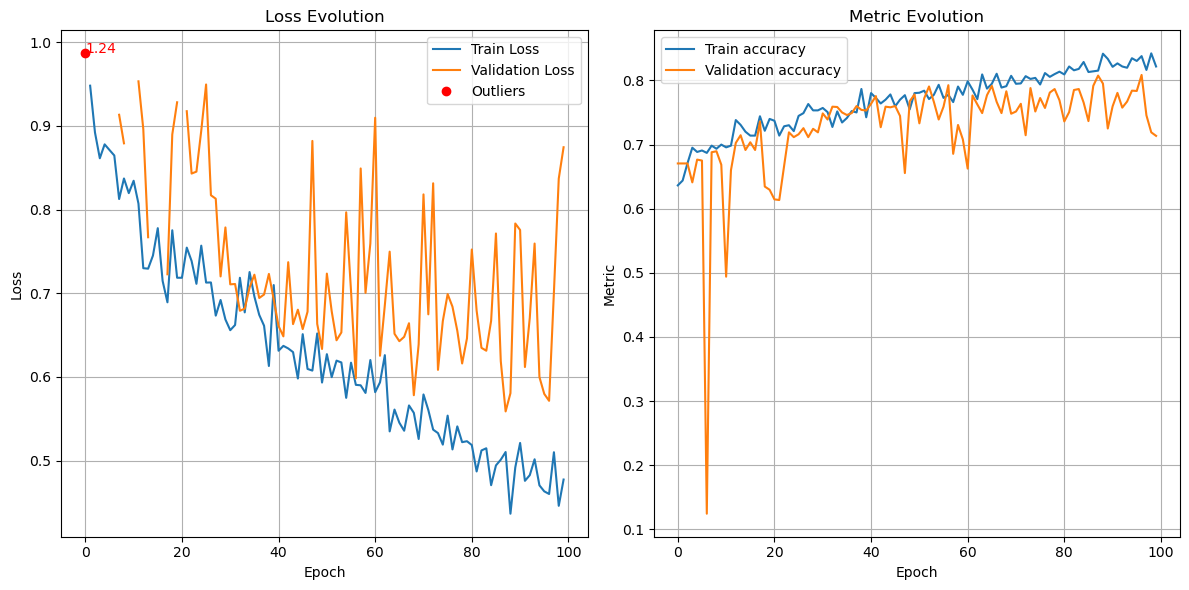

In [7]:
_, history = run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes: lambda: get_model_with_attention(HEIGHT, WIDTH, num_classes, metrics=METRICS),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20)